In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

# Poultry Distribution Identification

## Import Data

In [3]:
poultry_pops = pd.read_csv("data/nonzero_poultry_counts.txt", names =["count"])

In [5]:
max(poultry_pops["count"])

4723200

In [5]:
mean = float(poultry_pops.mean())
std = float(poultry_pops.std())

print("Poultry premises population data has \nMean: ", mean, "\nEmpirical variance: ", std**2)

Poultry premises population data has 
Mean:  7209.870356262603 
Empirical variance:  2514886756.268714


## Fitting Gamma Distribution

In [8]:
poultry_pops["log_count"] = poultry_pops["count"].map(np.log10)
poultry_pops.to_csv("data/nonzero_poultry_logcounts.txt")

In [11]:
g_fit_alpha, g_fit_loc, g_fit_beta=stats.gamma.fit(poultry_pops["log_count"])

In [12]:
sim_data = pd.DataFrame(stats.gamma.rvs(g_fit_alpha, loc=g_fit_loc, scale=g_fit_beta, size = len(poultry_pops)), columns = ["log_count"])
sim_data["count"] = sim_data["log_count"].map(lambda x: round(10**x))  
sim_data["rounded_log_count"] = sim_data["count"].map(np.log10)

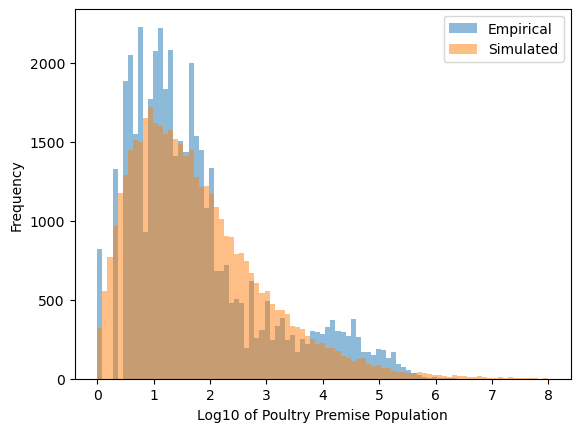

In [15]:
bins = np.linspace(0,8,90)
plt.hist(poultry_pops["log_count"], bins, alpha=0.5, label='Empirical')
plt.hist(sim_data["log_count"], bins, alpha=0.5, label='Simulated')
plt.legend(loc='upper right')
plt.xlabel("Log10 of Poultry Premise Population")
plt.ylabel("Frequency")
plt.savefig("log_poultry_pop_gamma_fit.png")


## Fitting Beta Distribution

In [17]:
poultry_pops["log_count"] = poultry_pops["count"].map(np.log10)
b_fit_alpha,b_fit_beta,b_fit_loc,b_fit_scale=stats.beta.fit(poultry_pops["log_count"],fscale = 6.7)
beta_sim_data = pd.DataFrame(stats.beta.rvs(b_fit_alpha,b_fit_beta, loc=b_fit_loc, scale=b_fit_scale, size = len(poultry_pops)), columns = ["log_count"])
beta_sim_data["count"] = beta_sim_data["log_count"].map(lambda x: round(10**x))  
beta_sim_data["rounded_log_count"] = beta_sim_data["count"].map(np.log10)

pdf = pd.DataFrame(np.linspace(0,6.7,1000),columns = ["x"])
pdf["f(x)"] = pdf["x"].map(lambda x: stats.beta.pdf(x,b_fit_alpha,b_fit_beta, loc=b_fit_loc, scale=fit_scale))

cdf = pd.DataFrame(np.linspace(0,6.7,1000),columns = ["x"])
cdf["f(x)"] = cdf["x"].map(lambda x: stats.beta.cdf(x,b_fit_alpha,b_fit_beta, loc=b_fit_loc, scale=fit_scale))

C:\Users\joebr\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


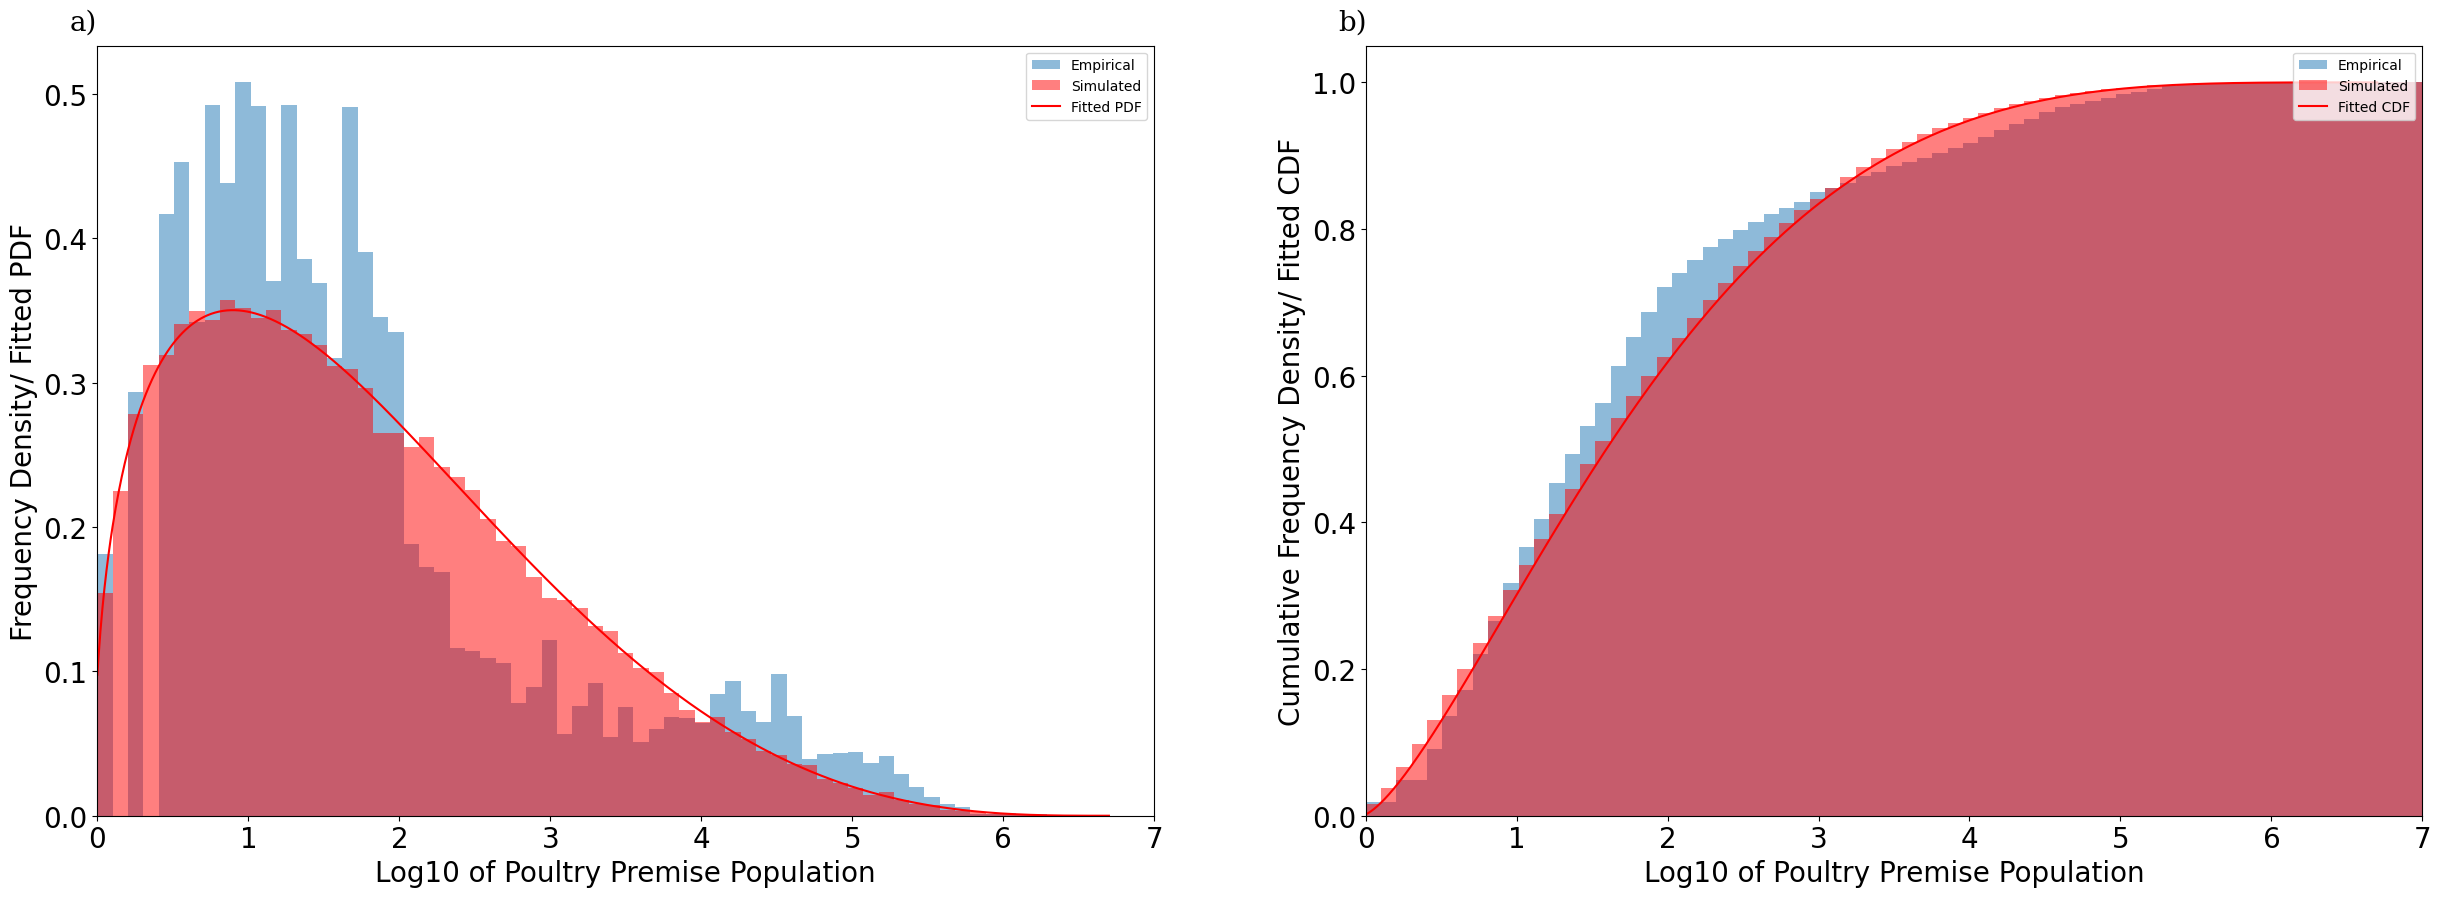

In [20]:
fig,ax = plt.subplots(1,2, figsize = (30,10))
bins = np.linspace(0,7,70)
ax[0].hist(poultry_pops["log_count"], bins, alpha=0.5, label='Empirical',density = True)
ax[0].hist(beta_sim_data["log_count"], bins, alpha=0.5, label='Simulated',density = True, color = "r")

ax[0].plot(pdf["x"],pdf["f(x)"],color = "r",label = "Fitted PDF")

ax[0].legend(loc='upper right')
ax[0].set_xlim((0,7))
ax[0].set_xlabel("Log10 of Poultry Premise Population")
ax[0].set_ylabel("Frequency Density/ Fitted PDF")

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(0.0, 1.0, "a)", transform=ax[0].transAxes + trans,
            fontsize=20, va='bottom', fontfamily='serif')



ax[1].hist(poultry_pops["log_count"], bins, alpha=0.5, label='Empirical',density = True,cumulative = True)
ax[1].hist(beta_sim_data["log_count"], bins, alpha=0.5, label='Simulated',density = True,cumulative = True, color = "r")

ax[1].plot(cdf["x"],cdf["f(x)"],color = "r",label = "Fitted CDF")

ax[1].legend(loc='upper right')
ax[1].set_xlim((0,7))
ax[1].set_xlabel("Log10 of Poultry Premise Population")
ax[1].set_ylabel("Cumulative Frequency Density/ Fitted CDF")

ax[1].text(0.0, 1.0, "b)", transform=ax[1].transAxes + trans,
            fontsize=20, va='bottom', fontfamily='serif')


for i in ax:
    for item in ([i.title, i.xaxis.label, i.yaxis.label] +
                 i.get_xticklabels() + i.get_yticklabels()):
        item.set_fontsize(20)

        
        
fig.savefig("log_poultry_pop_beta_fit.png")

## MCMC Plots

In [14]:
mcmc_fit_alpha =    141.4715              
mcmc_fit_beta =  3.9546 
mcmc_fit_loc =     -0.0246 
mcmc_fit_scale =  6.7

In [15]:
poultry_pops["log_count"] = poultry_pops["count"].map(np.log10)
beta_sim_data = pd.DataFrame(stats.beta.rvs(mcmc_fit_alpha,mcmc_fit_beta, loc=mcmc_fit_loc, scale=mcmc_fit_scale, size = len(poultry_pops)), columns = ["log_count"])
beta_sim_data["count"] = beta_sim_data["log_count"].map(lambda x: round(10**x))  
beta_sim_data["rounded_log_count"] = beta_sim_data["count"].map(np.log10)

pdf = pd.DataFrame(np.linspace(0,6.7,1000),columns = ["x"])
pdf["f(x)"] = pdf["x"].map(lambda x: stats.beta.pdf(x,mcmc_fit_alpha,mcmc_fit_beta, loc=mcmc_fit_loc, scale=mcmc_fit_scale))

cdf = pd.DataFrame(np.linspace(0,6.7,1000),columns = ["x"])
cdf["f(x)"] = cdf["x"].map(lambda x: stats.beta.cdf(x,mcmc_fit_alpha,mcmc_fit_beta, loc=mcmc_fit_loc, scale=mcmc_fit_scale))

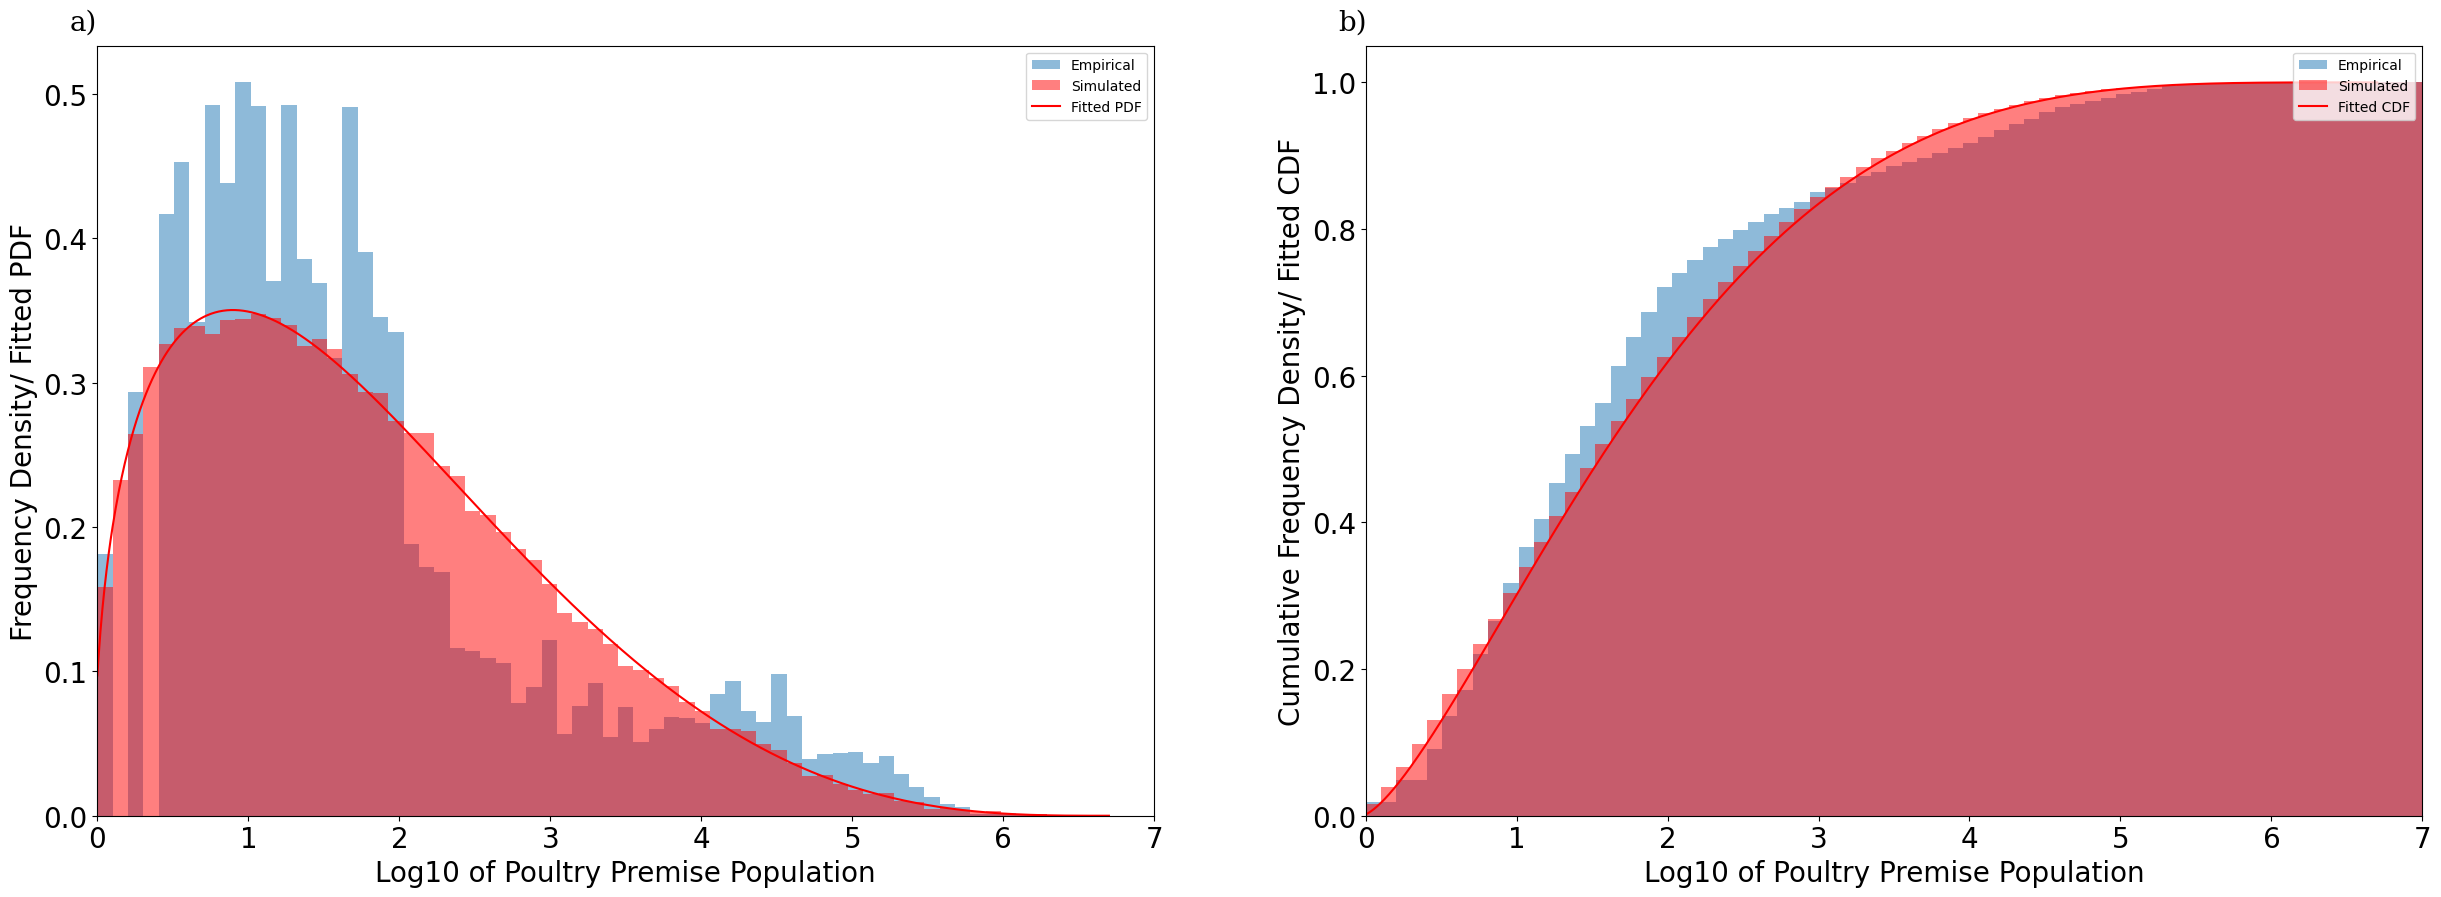

In [16]:
fig,ax = plt.subplots(1,2, figsize = (30,10))
bins = np.linspace(0,7,70)
ax[0].hist(poultry_pops["log_count"], bins, alpha=0.5, label='Empirical',density = True)
ax[0].hist(beta_sim_data["log_count"], bins, alpha=0.5, label='Simulated',density = True, color = "r")

ax[0].plot(pdf["x"],pdf["f(x)"],color = "r",label = "Fitted PDF")

ax[0].legend(loc='upper right')
ax[0].set_xlim((0,7))
ax[0].set_xlabel("Log10 of Poultry Premise Population")
ax[0].set_ylabel("Frequency Density/ Fitted PDF")

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(0.0, 1.0, "a)", transform=ax[0].transAxes + trans,
            fontsize=20, va='bottom', fontfamily='serif')



ax[1].hist(poultry_pops["log_count"], bins, alpha=0.5, label='Empirical',density = True,cumulative = True)
ax[1].hist(beta_sim_data["log_count"], bins, alpha=0.5, label='Simulated',density = True,cumulative = True, color = "r")

ax[1].plot(cdf["x"],cdf["f(x)"],color = "r",label = "Fitted CDF")

ax[1].legend(loc='upper right')
ax[1].set_xlim((0,7))
ax[1].set_xlabel("Log10 of Poultry Premise Population")
ax[1].set_ylabel("Cumulative Frequency Density/ Fitted CDF")

ax[1].text(0.0, 1.0, "b)", transform=ax[1].transAxes + trans,
            fontsize=20, va='bottom', fontfamily='serif')


for i in ax:
    for item in ([i.title, i.xaxis.label, i.yaxis.label] +
                 i.get_xticklabels() + i.get_yticklabels()):
        item.set_fontsize(20)

        
        
fig.savefig("log_poultry_pop_beta_fit.png")

In [21]:
print(b_fit_alpha)
print(b_fit_beta)
print(b_fit_loc)
print(b_fit_scale)

1.4709515345874549
3.9521542417123277
-0.024762702437304038
6.7
